# Visualizing Cycle Checking Strategies: Maze

Cycles are an issue with DFS.



# Code

Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).


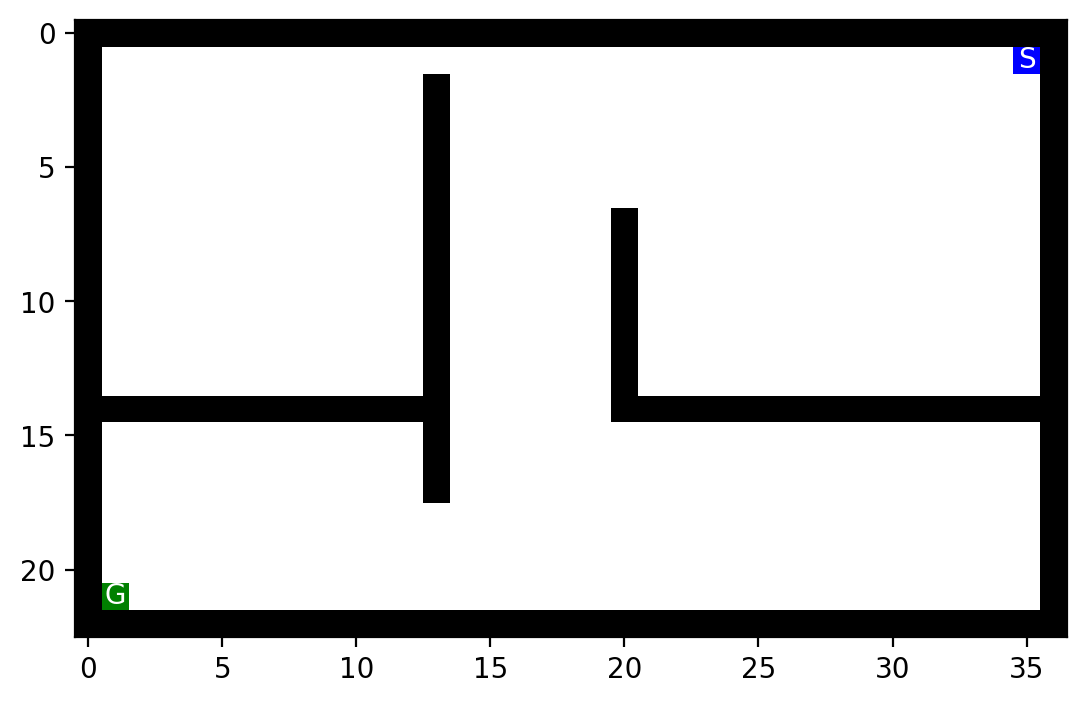

In [1]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np


#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_maze_2.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

show_maze(maze)

The tree search code implementation is in [tree_search.py](tree_search.py) (not published).

In [2]:
# tree_search.py has my actual implementation
import tree_search_solution as ts

# order in which we add new states to the frontier
ts.set_order("NESW")
#ts.set_order(random=True)


Directions are checked in the order ['N', 'E', 'S', 'W']
Directions are checked in the order ['N', 'E', 'S', 'W']


## DFS Cycle checking option 1: Check in the path + ignore the frontier

Ignoring the frontier is probably the easiest. We just check the path for cycles and add all non-cycle notes to the frontier.
The issue is that we can end up with the same node multiple times in the frontier.


In [7]:
%time result = ts.DFS(maze, vis = False, animation = True, max_tries=500, frontier_option = 3)

ts.animate_maze(result)

CPU times: user 30.3 ms, sys: 3.83 ms, total: 34.1 ms
Wall time: 31.5 ms
No solution found.


The room looks solid red, but there are still some of the red points left in the frontier!

## DFS Cycle checking option 2: Check in the path + don't add states that are already in the frontier a second time.
This unfortunately does not work and produces an infinite loop if there are any open spaces in the maze!

In [6]:
%time result = ts.DFS(maze, animation = True, max_tries = 500, frontier_option = 2)

ts.animate_maze(result)

CPU times: user 34.9 ms, sys: 8.03 ms, total: 42.9 ms
Wall time: 40 ms
No solution found.


Note that there are still frontier entires (orange squares) left when DFS removed a completed branch from memory (squares that turn white). This is a problem, since DFS will explore them again leading to an infinite loop.



## DFS Cycle checking option 3: Check in the path + fix the frontier by moving found states to the top of the frontier stack
Increasing the priority of a frontier entry when we see it again solves this issue. Note that there are no orange squares left when DFS removes a path from memory so it knows that this part of the maze is done.

In [4]:
%time result = ts.DFS(maze, vis = False, animation = True, max_tries=500, frontier_option = 1)

ts.animate_maze(result)

CPU times: user 51.2 ms, sys: 122 μs, total: 51.3 ms
Wall time: 47.6 ms
Path length: 54
Reached squares: 0
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']
